In [1]:
import skimage
import skimage.io as io
import skimage.feature
import skimage.filters
import skimage.transform
import skimage.morphology
import skimage.exposure
from skimage.morphology.selem import square, rectangle, diamond, disk
from scipy import ndimage as ndi
from scipy.fft import fft2, fftshift
import numpy as np
import matplotlib.pylab as plt
from skimage.draw import polygon_perimeter


C:\Users\Mostafa\AppData\Local\Temp/ipykernel_7104/4199956151.py:8: FutureWarning: The `skimage.morphology.selem` module is deprecated and will be removed in scikit-image 1.0 (`skimage.morphology.selem` has been moved to `skimage.morphology.footprints`).
  from skimage.morphology.selem import square, rectangle, diamond, disk


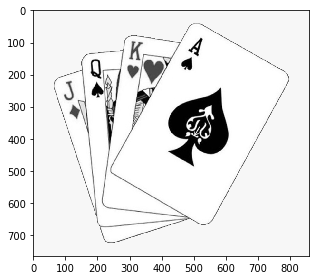

In [2]:
img = io.imread('cards2.png', as_gray=True)
io.imshow(img)

C:\Users\Mostafa\AppData\Roaming\Python\Python39\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


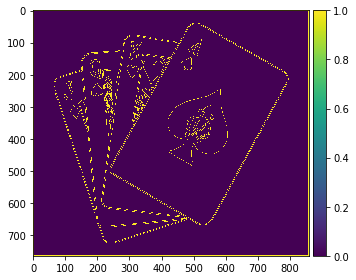

In [3]:
img_canny = skimage.feature.canny(img, sigma=1)
io.imshow(img_canny  + 0)

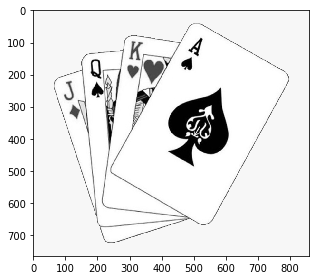

In [4]:
io.imshow(img + 0.0)
img1 = img > 0.8

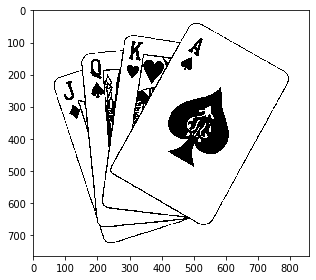

In [5]:
io.imshow(img1 + 0.0)

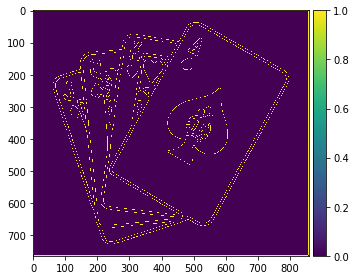

In [6]:
img_canny = skimage.feature.canny(img1, sigma=4)
io.imshow(img_canny  + 0)

In [7]:
countours = skimage.measure.find_contours(img1)
print(countours[0].shape)

(2923, 2)


In [8]:
import matplotlib.pylab as plt

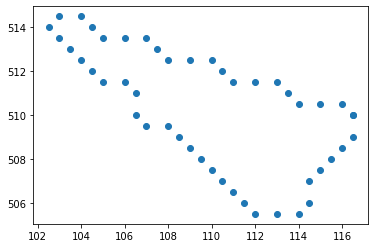

In [9]:
plt.scatter(countours[5][:, 0], countours[5][:, 1])

In [10]:
def dfs(img, v, r, c, i, j):
    s = 1
    v[i][j] = 1
    stack = []
    stack.append((i,j))
    while (len(stack) != 0):
        (i,j) = stack.pop()
        
        if i+1 < r and v[i+1][j] == 0 and img[i+1][j] < 0.5:
            v[i+1][j] = 1
            s = s + 1
            stack.append((i+1,j))

        if i-1 > -1 and v[i-1][j] == 0 and img[i-1][j] < 0.5:
            v[i-1][j] = 1
            s = s + 1
            stack.append((i-1,j))

    
        if j+1 < c and v[i][j+1] == 0 and img[i][j+1] < 0.5:
            v[i][j+1] = 1
            s = s + 1
            stack.append((i,j+1))


        if j-1 > -1 and v[i][j-1] == 0 and img[i][j-1] < 0.5:
            v[i][j-1] = 1
            s = s + 1
            stack.append((i,j-1))
    return s


def connected_components(img):
    r,c = np.shape(img)
    v = np.zeros((r, c))
    t = []
    for i in range(r):
        for j in range(c):
            if v[i][j] == 0 and img[i][j] < 0.5:
                t.append(dfs(img, v, r, c, i, j))

    return t

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

23


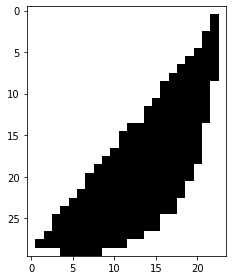

In [41]:
i = 0
Arr = [ 'H', '4', '3', '5', '2', 'D', 'H', 'C', 'S', 'C', 'A', 'D', 'S', 'J', 'C', 'C', 'J', 'D']
Imgs = ['istockphoto-496913440-170667a.jpg', './st040.jpg', './1200px-7_playing_cards.jpg',
        '2.jpg','3.jpg','4.jpg', './AcetoFive.jpeg', './cards2.png', 
        './cards3.jpeg', './depositphotos_21549311-stock-photo-playing-cards-in-hand.jpg', 
        './Skatblatt_02.jpg']
# Imgs = ['./AcetoFive.jpeg']
k = 0
for imgpath in Imgs: 
    OGimg = read_img(path=imgpath)
    
    img = skimage.exposure.equalize_adapthist(OGimg)
    # io.imshow(img)
    # plt.show()
    
    if np.shape(img)[0] > 500 and np.shape(img)[1] > 500:
      img = skimage.morphology.erosion(OGimg + 0.0)

    img = skimage.filters.gaussian(img, sigma=2)
    segm = segmentation(img)
    # io.imshow(segm + 0.0)
    # plt.show()
    countours = contour_detection(segm)
    rem_countors = [False] * len(countours)

    for i in range(len(countours)):
        countour = countours[i]
        if not (max(countour[:,0]) - min(countour[:,0]) > img.shape[0]*0.016 and \
        max(countour[:,1]) - min(countour[:,1]) > img.shape[1]*0.016 and \
        max(countour[:,0]) - min(countour[:,0]) < img.shape[0]*0.083 and \
        max(countour[:,1]) - min(countour[:,1]) < img.shape[1]*0.083 and \
        len(countour[:,0]) > (img.shape[1] + img.shape[0])/25 and \
        (max(countour[:,0]) - min(countour[:,0]))/(max(countour[:,1]) - min(countour[:,1])) < 2.53 and \
        (max(countour[:,1]) - min(countour[:,1]))/(max(countour[:,0]) - min(countour[:,0])) < 2.53):
          rem_countors[i] = True  

    for i in range(len(countours)):
      if not rem_countors[i]:
        xi = min(countours[i][:,0])
        yi = min(countours[i][:,1])
        Xi = max(countours[i][:,0])
        Yi = max(countours[i][:,1])
        Ai = (Xi-xi)*(Yi-yi)
        for j in range(len(countours)):
          if not rem_countors[j]:
            xj = min(countours[j][:,0])
            yj = min(countours[j][:,1])
            Xj = max(countours[j][:,0])
            Yj = max(countours[j][:,1])
            Aj = (Xj-xj)*(Yj-yj)
            if  xi <= xj and yi <= yj and Xi >= Xj and Yi >= Yj and i != j:
              if Ai > 9 * Aj:
                rem_countors[i] = True
              else:
                rem_countors[j] = True

    imageList=[]
    # print(rem_countors)
    for i in range(len(countours)):
        countour = countours[i]
        if not rem_countors[i]:
          img_sec = OGimg[int(min(countour[:,0])) : int(max(countour[:,0])),int(min(countour[:,1])) : int(max(countour[:,1]))] + 0.0
          img_sec_seg = segmentation(img_sec)
          t = connected_components(img_sec_seg)
          if not (len(t) > 5 or (min(t) > 20 and len(t) > 2)) and \
            max(t)/(len(img_sec_seg)*len(img_sec_seg[0])) > 0.175 and max(t)/(len(img_sec_seg)*len(img_sec_seg[0])) < 0.875:
            # io.imshow(img_sec)
            # skimage.exposure.histogram(img_sec)
            # plt.show()
            io.imshow(img_sec_seg)
            io.imsave('./imgs/' + str(k) + '.jpg', skimage.transform.resize(img_sec_seg, (40,30)) + 0.0 )
            k = k + 1
            # plt.show()
            # print(t,len(img_sec_seg)*len(img_sec_seg[0]), max(t)/(len(img_sec_seg)*len(img_sec_seg[0])))
            # print(np.shape(img_sec)[0]/np.shape(OGimg)[0], np.shape(img_sec)[1]/np.shape(OGimg)[1])
          #plt.scatter(countour[:, 0], countour[:, 1])
          #plt.show()
          #print("('{}',{},{}),".format(Arr[i], (max(countour[:,0]) + min(countour[:,0]))/2, (max(countour[:,1]) + min(countour[:,1]))/2))
          #i = i + 1
            imageList.append(skimage.transform.resize(img_sec_seg, (40,30)))

print(len(imageList))

    # H, 4, 3, 5, 2, D, H, C, S, C, A, D, S, J, C, C, J, D

In [ ]:
from joblib import dump, load
# load the model
model_KNN = load('../model/KNN_model.joblib')
model_SVC = load('../model/SVC_model.joblib')
model_rf = load('../model/rf_model.joblib')

for image in imageList:
    print("KNN:", model_KNN.predict([image.flatten()]), "SVM:", model_SVC.predict([image.flatten()]), "RF:", model_rf.predict([image.flatten()]))
    io.imshow(image)
    plt.show()

In [12]:
countours[0][:, 0]

array([724. , 723. , 722.5, ..., 724.5, 724.5, 724. ])

In [13]:
len(countours)

69

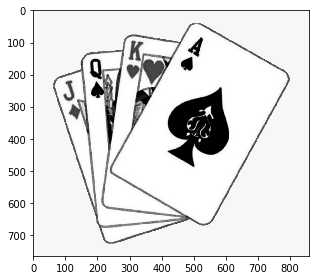

In [14]:
dilated = skimage.morphology.erosion(skimage.morphology.erosion(img))
io.imshow(dilated + 0.0)

In [15]:
hog = skimage.feature.hog(dilated + 0)
print(len(hog))

790965


In [16]:
img.shape

(765, 860)

In [17]:
from skimage import segmentation

In [18]:
seg = segmentation.chan_vese(dilated+ 0)

In [19]:
from skimage.filters import threshold_otsu
def segmentation(img):
    th = threshold_otsu(img)
    img1 = img > th
    return img1 + 0.0


In [20]:
def contour_detection(img):
    return skimage.measure.find_contours(img)

In [21]:
def errosion(img):
    return skimage.morphology.erosion(img) + 0.0

In [22]:
def dilation(img):
    return skimage.morphology.dilation(img) + 0.0

In [23]:
def read_img(path):
    return io.imread(path, as_gray=True)

In [24]:
def region_based_segmentation(img):
    elevation_map = skimage.filters.sobel(img)
    
    # Finding Markers:
    markers = np.zeros_like(img)
    markers[img < 30] = 1
    markers[img > 150] = 2
    
    # Filling the gaps:
    segmentation = skimage.morphology.watershed(elevation_map, markers)
    
    # Segment and Label Indvidually
    segmentation = ndi.binary_fill_holes(segmentation - 1)
    labeled_coins, _ = ndi.label(segmentation)
    image_label_overlay = skimage.color.label2rgb(labeled_coins, image=img)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)
    ax1.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
    ax1.contour(segmentation, [0.5], linewidths=1.2, colors='y')
    ax1.axis('off')
    ax2.imshow(image_label_overlay, interpolation='nearest')
    ax2.axis('off')
    #ax2.set_adjustable('box-forced')
    
    return image_label_overlay

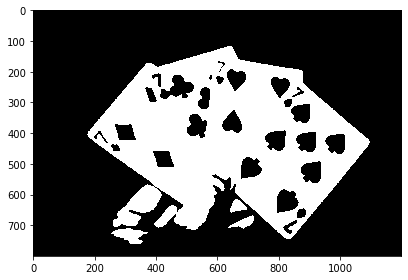

In [25]:
img = read_img(path='./1200px-7_playing_cards.jpg')
img = errosion(img)
img = errosion(img)
img = errosion(img)
img = skimage.filters.gaussian(img, sigma=3)
segm = segmentation(img)
io.imshow(segm + 0.0)
countours = contour_detection(segm)
#img_new = region_based_segmentation(img)

In [26]:
def draw_bbox(img, contours):
    bounding_boxes = []

    for contour in contours:
        Xmin = np.min(contour[:,0])
        Xmax = np.max(contour[:,0])
        Ymin = np.min(contour[:,1])
        Ymax = np.max(contour[:,1])

        bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])


    with_boxes  = np.copy(img)

    for box in bounding_boxes:
        #[Xmin, Xmax, Ymin, Ymax]
        print(box)
        r = [box[0],box[1],box[1],box[0], box[0]]
        c = [box[3],box[3],box[2],box[2], box[3]]
        rr, cc = polygon_perimeter(r, c, with_boxes.shape)
        with_boxes[rr, cc] = 0.6 #set color white

    plt.imshow(with_boxes, interpolation='nearest', cmap=plt.cm.gray)
    plt.show()
    return with_boxes, bounding_boxes


[166.5, 201.5, 601.5, 623.5]


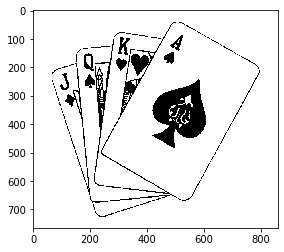

In [27]:
bbox_img, bounding_boxes = draw_bbox(img1, [countours[1]])

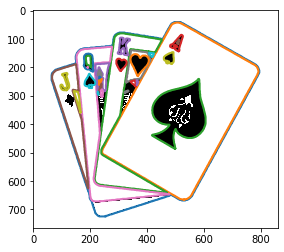

In [28]:
contours = skimage.measure.find_contours(img1)

fig, ax = plt.subplots()
ax.imshow(img1, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    if n == len(countours) - 1:
        break
    if len(countours[n]) > 0:
        ax.plot(contours[n][:, 1], contours[n][:, 0], linewidth=2)

plt.show()

In [29]:
len(countours[5])

51

In [30]:
len(countours)

31

In [31]:
img1 = read_img('./AcetoFive.jpeg')

In [32]:
print(bbox_img)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [33]:
x_min, x_max, y_min, y_max = bounding_boxes[0]

In [34]:
imgRect = img1[int(x_min): int(x_max), int(y_min) : int(y_max)]

C:\Users\Mostafa\AppData\Roaming\Python\Python39\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


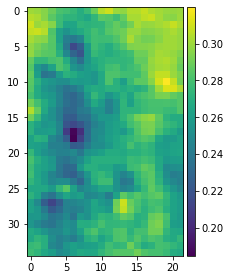

In [35]:
io.imshow(imgRect)

In [36]:
!pip install emnist

In [37]:
from emnist import extract_training_samples
images, labels = extract_training_samples('letters')


KeyboardInterrupt: 

In [ ]:
images[0].shape

In [ ]:
imgRect.shape

In [ ]:
from skimage.transform import rescale, resize, downscale_local_mean
image_resized = resize(imgRect, (28, 28),
                       anti_aliasing=True)

In [ ]:
io.imshow(1-image_resized)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline

sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(images.reshape(images.shape[0], -1), labels)

In [ ]:
sgd_clf.predict((1-image_resized).reshape(1, 28*28))

In [ ]:
for i, label in enumerate(labels):
    print(f'for {i} label is {label}')

In [ ]:
for image in images:
    io.imshow(image)
    